<div style="background-color: #F0F8FF; padding: 20px;">

<h1 style="color: orange; font-size: 24px;">Zee Recommender Systems</h1>

**Developing movie recommendation systems! To suggest movies based on the ratings you give and what other users who share similar tastes enjoy. This way, we can enhance your movie-watching experience with personalized suggestions.**

<h2 style="color: blue;">Data Dictionary</h2>

<h3 style="font-size: 14px;">RATINGS FILE DESCRIPTION</h3>
==================================================================================================================
    
- All ratings are contained in the file "ratings.dat" and are in the following format:
    - **UserID::MovieID::Rating::Timestamp**
    - UserIDs range between 1 and 6040   
    - MovieIDs range between 1 and 3952
    - Ratings are made on a 5-star scale (whole-star ratings only)
    - Timestamp is represented in seconds
    - Each user has at least 20 ratings

<h2 style="font-size: 14px;">USERS FILE DESCRIPTION</h2>
=================================================================================================================
    
- User information is in the file "users.dat" and is in the following format:
    - **UserID::Gender::Age::Occupation::Zip-code**
- All demographic information is provided voluntarily by the users and is not checked for accuracy.
- Only users who have provided some demographic information are included in this data set.
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:
     - 1: "Under 18"
     - 18: "18-24"
     - 25: "25-34"
     - 35: "35-44"
     - 45: "45-49"
     - 50: "50-55"
     - 56: "56+"
- Occupation is chosen from the following choices:
     - 0: "other" or not specified
     - 1: "academic/educator"
     - 2: "artist"
     - 3: "clerical/admin"
     - 4: "college/grad student"
     - 5: "customer service"
     - 6: "doctor/health care"
     - 7: "executive/managerial"
     - 8: "farmer"
     - 9: "homemaker"
     - 10: "K-12 student"
     - 11: "lawyer"
     - 12: "programmer"
     - 13: "retired"
     - 14: "sales/marketing"
     - 15: "scientist"
     - 16: "self-employed"
     - 17: "technician/engineer"
     - 18: "tradesman/craftsman"
     - 19: "unemployed"
     - 20: "writer"

<h2 style="font-size: 14px;">MOVIES FILE DESCRIPTION</h2>
=================================================================================================================
    
- Movie information is in the file "movies.dat" and is in the following format:
     - **MovieID::Title::Genres**
- Titles are identical to titles provided by the IMDB (including year of release)
- Genres are pipe-separated and are selected from the following genres:      
     - Action
     - Adventure
     - Animation
     - Children's
     - Comedy
     - Crime
     - Documentary
     - Drama
     - Fantasy
     - Film-Noir
     - Horror
     - Musical
     - Mystery
     - Romance
     - Sci-Fi
     - Thriller
     - War
     - Western

<h2 style="color: green; font-size: 14px;">Concepts Tested:</h2>
    
- Recommender Engine
- Collaborative Filtering (Item-based & User-based Approach)
- Pearson Correlation
- Nearest Neighbors using Cosine Similarity
- Matrix Factorization

</div>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

**loading the users file and separating columns as per USERS FILE DESCRIPTION**

In [ ]:
delimiter = "::"

# Read the .dat file into a DataFrame
users = pd.read_csv("zee-users.dat", sep=delimiter, engine='python')

In [ ]:
users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [ ]:
print(f"Number of rows: {users.shape[0]}\nNumber of columns: {users.shape[1]}")

Number of rows: 6040
Number of columns: 5


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
# checking null values
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

- **No null values present in users table.**

**loading movies file and separating columns as per MOVIES FILE DESCRIPTION**

In [ ]:
# function to load movies file
def movies_column_separator(file_path):
    df_movies = pd.read_fwf(file_path, encoding='ISO-8859-1')
    # choosing 1st column
    movies= df_movies.iloc[0:, [0]]

    #seperating the column
    movies[['Movie ID', 'Title', 'Genres']] = movies['Movie ID::Title::Genres'].str.split("::", expand=True)

    # Drop the original combined columnmovies
    movies.drop(columns=['Movie ID::Title::Genres'], inplace=True)

    return movies

In [ ]:
file_path= "zee-movies.dat"
movies= movies_column_separator(file_path)

In [ ]:
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print(f"Number of rows: {movies.shape[0]}\nNumber of columns: {movies.shape[1]}")

Number of rows: 3883
Number of columns: 3


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   object
 1   Title     3883 non-null   object
 2   Genres    3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [ ]:
movies.isna().sum()

Movie ID     0
Title        0
Genres      25
dtype: int64

- **In movies table "Genres" have 25 null values**
- Movie ID should be of int dtype.

**Loading rating file and separating as per RATINGS FILE DESCRIPTION**

In [ ]:
ratings = pd.read_csv("zee-ratings.dat", sep=delimiter, engine='python')

In [ ]:
ratings.tail()

,UserID,MovieID,Rating,Timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [ ]:
print(f"Number of rows: {ratings.shape[0]}\nNumber of columns: {ratings.shape[1]}")

Number of rows: 1000209
Number of columns: 4


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
# checking for null values
ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

- Timestamp column is in seconds so converting it to standard timestamp format
- No null values in ratings table

In [ ]:
# changing timestamp formate
ratings["Timestamp"]= pd.to_datetime(ratings['Timestamp'],  unit='s')

In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


## Exploratory Data Analysis

In [ ]:
users.describe(include="all")

,UserID,Gender,Age,Occupation,Zip-code
count,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3020.500000,NaN,30.639238,8.146854,NaN
std,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,1.000000,0.000000,NaN
25%,1510.750000,NaN,25.000000,3.000000,NaN
50%,3020.500000,NaN,25.000000,7.000000,NaN
75%,4530.250000,NaN,35.000000,14.000000,NaN


- Users average age seems to be 30 but 50% users have age less than or equal to 25, so there may be some outliers.
- and maximum age of user is 56 and minimum is 30

In [ ]:
movies.describe(include="all")

,Movie ID,Title,Genres
count,3883,3883,3858
unique,3883,3883,360
top,1,Toy Story (1995),Drama
freq,1,1,830


In [ ]:
ratings.describe(include="all")

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209
mean,3.024512e+03,1.865540e+03,3.581564e+00,2000-10-22 19:41:35.404665856
min,1.000000e+00,1.000000e+00,1.000000e+00,2000-04-25 23:05:32
25%,1.506000e+03,1.030000e+03,3.000000e+00,2000-08-03 11:37:17
50%,3.070000e+03,1.835000e+03,4.000000e+00,2000-10-31 18:46:46
75%,4.476000e+03,2.770000e+03,4.000000e+00,2000-11-26 06:42:19
max,6.040000e+03,3.952000e+03,5.000000e+00,2003-02-28 17:49:50
std,1.728413e+03,1.096041e+03,1.117102e+00,NaN


In [ ]:
movies["Movie ID"].nunique()

3883

- There are 3883 movies in total.

In [ ]:
users["UserID"].nunique()

6040

In [ ]:
ratings["UserID"].nunique()

6040

In [ ]:
ratings["MovieID"].nunique()

3706

In [ ]:
# movie rating
ratings["Rating"].value_counts()

Rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64

In [ ]:
# In percetage
ratings["Rating"].value_counts(normalize=True)*100

Rating
4    34.889808
3    26.114242
5    22.626271
2    10.753453
1     5.616226
Name: proportion, dtype: float64

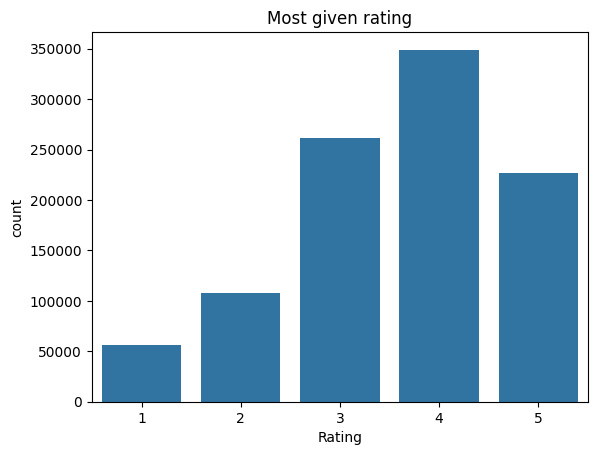

In [ ]:
sns.countplot(data=ratings, x="Rating")
plt.title("Most given rating")
plt.show()

- Most of the user(34.89%) gave rating 4 to the movies.
- very few(5.61%) movies rated 1 by the users.

In [ ]:
# Top 10 movie genres
movies["Genres"].value_counts()[:10]

Genres
Drama             830
Comedy            518
Horror            172
Comedy|Drama      159
Comedy|Romance    136
Drama|Romance     128
Documentary       106
Thriller          101
Action             65
Drama|Thriller     63
Name: count, dtype: int64

In [ ]:
users["Gender"].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

In [ ]:
users["Gender"].value_counts(normalize=True)

Gender
M    0.717053
F    0.282947
Name: proportion, dtype: float64

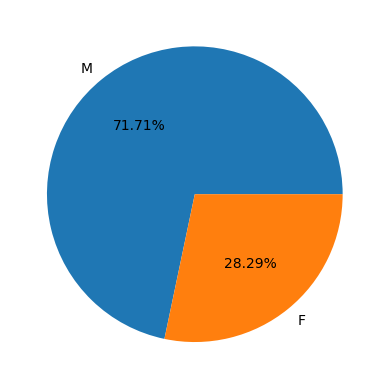

In [ ]:
# sns.countplot(data=users, x="Gender")
plt.pie(users["Gender"].value_counts(), labels= users["Gender"].value_counts().index, autopct='%.2f%%' )
plt.show()

- **72% users are Male and 28% are Female**

In [ ]:
# Top 10 users who gave most rating
ratings.groupby("UserID")["Rating"].count().sort_values(ascending=False).head(10)

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: Rating, dtype: int64

In [ ]:
users["Occupation"].value_counts(normalize=True)*100

Occupation
4     12.566225
0     11.771523
7     11.241722
1      8.741722
17     8.311258
12     6.423841
14     5.000000
20     4.652318
2      4.420530
16     3.990066
6      3.907285
10     3.228477
3      2.864238
15     2.384106
13     2.350993
11     2.135762
5      1.854305
9      1.523179
19     1.192053
18     1.158940
8      0.281457
Name: proportion, dtype: float64

- Most of the users (almost 35%) with following occupation :
     - **"college/grad student",  "other or not specified",  "executive/managerial", "academic/educator"**

- Very few user(**only 6% in total**) have following occupation : **"farmer", "tradesman/craftsman", "unemployed", "homemaker", "customer service"**

In [ ]:
users["Age"].value_counts(normalize=True)*100

Age
25    34.701987
35    19.751656
18    18.261589
45     9.105960
50     8.211921
56     6.291391
1      3.675497
Name: proportion, dtype: float64

- Age is in the age range as a categorical dtype
- 35% users are in range of 25 to 34 age
- 20% users are in range of 35 to 44 age
- only 4% users are under 18

#### Extracting Release_year from Title and cleaning.

In [ ]:
def year_extr(x):
    m= x.split("(")[-1].strip("):").strip(")")
    if m.isdigit():
        return m
    else:
        np.nan

In [ ]:
movies["Release_year"]= movies["Title"].apply(year_extr)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      3883 non-null   object
 1   Title         3883 non-null   object
 2   Genres        3858 non-null   object
 3   Release_year  3874 non-null   object
dtypes: object(4)
memory usage: 121.5+ KB


In [ ]:
movies["Release_year"].unique()

array(['1995', '1994', '1996', None, '1976', '1993', '1992', '1988',
       '1967', '1964', '1977', '1965', '1982', '1962', '1990', '1991',
       '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960',
       '1955', '1956', '1959', '1968', '1980', '1975', '1986', '1948',
       '1943', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947',
       '1945', '1938', '1935', '1936', '1926', '1932', '1930', '1971',
       '1979', '1966', '1978', '1985', '1983', '1984', '1931', '1922',
       '19', '1927', '1929', '195', '1928', '1925', '1923', '1999',
       '1919', '2000', '1', '1920', '1921'], dtype=object)

**cleaning Release_year column**

In [ ]:
movies['Release_year'] = movies['Release_year'].replace('1', '1970')

In [ ]:
movies['Release_year'] = movies['Release_year'].replace('195', '1954')

In [ ]:
movies.head()

,Movie ID,Title,Genres,Release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


- we will need convert the "Release_year" to int dtype.

- In year 1996, 1995 and 1998 have most release movies

In [ ]:
movies.loc[movies['Title'] == "City of the Living Dead (Paura nella città dei morti viventi) (19", 'Release_year'] = 1980
movies.loc[movies['Title'] == "City of the Living Dead (Paura nella città dei morti viventi) (19", 'Genres'] = "Horror|Western"


movies.loc[movies['Title'] == "Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (19", 'Release_year'] = 1970
movies.loc[movies['Title'] == "Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (19", 'Genres'] = "War|Drama"

movies.loc[movies['Title'] == "Decline of Western Civilization Part II: The Metal Years, The (19", 'Release_year'] = 1988
movies.loc[movies['Title'] == "Decline of Western Civilization Part II: The Metal Years, The (19", 'Genres'] = "Documentary|Music"

movies.loc[movies['Title'] == "Went to Coney Island on a Mission From God... Be Back by Five (19", 'Release_year'] = 1998
movies.loc[movies['Title'] == "Went to Coney Island on a Mission From God... Be Back by Five (19", 'Genres'] = "Drama"



In [ ]:
# cleaning Genres

In [ ]:
movies.loc[movies["Genres"]==""]

,Movie ID,Title,Genres,Release_year
1339,1360,Identification of a Woman (Identificazione di ...,,1982
2636,2705,"Late August, Early September (Fin août, début ...",,1998


In [ ]:
movies.loc[movies['Title'] == "Identification of a Woman (Identificazione di una donna) (1982)", 'Genres'] = "Romance|Drama"
movies.loc[movies['Title'] == "Late August, Early September (Fin août, début septembre) (1998)", 'Genres'] = "Romance|Drama"

In [ ]:
# function to extract only Movie title from Title column

def movie_title(x):
    m= x.split("(")[:-1]
    return " ".join(m).strip().strip(")")

In [ ]:
movies["Title"]= movies["Title"].apply(movie_title)

In [ ]:
movies.loc[movies['Title'].str.endswith(('The', 'the'))]

,Movie ID,Title,Genres,Release_year
10,11,"American President, The",Comedy|Drama|Romance,1995
28,29,"City of Lost Children, The",Adventure|Sci-Fi,1995
49,50,"Usual Suspects, The",Crime|Thriller,1995
53,54,"Big Green, The",Children's|Comedy,1995
59,60,"Indian in the Cupboard, The",Adventure|Children's|Fantasy,1995
...,...,...,...,...
3866,3936,"Phantom of the Opera, The",Drama|Thriller,1943
3868,3938,"Slumber Party Massacre, The",Horror,1982
3869,3939,"Slumber Party Massacre II, The",Horror,1987
3870,3940,"Slumber Party Massacre III, The",Horror,1990


**- As we can see in above filter there are some movies which are ending with "The" which is may be error.**

In [ ]:
# Function to remove "the" or "The" from the end of movie names
def remove_suffix(movie_name):
    if movie_name.lower().endswith('the'):
        return movie_name[:-3].strip()
    else:
        return movie_name

In [ ]:
# Apply the function to the 'movie_name' column
movies['Title'] = movies['Title'].apply(remove_suffix)

In [ ]:
movies.loc[movies['Title'].str.endswith(('The', 'the'))]

,Movie ID,Title,Genres,Release_year


####  Merging the three dataframe

In [ ]:
user_rating= users.merge(ratings, on="UserID", how="inner")

In [ ]:
user_rating.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,2000-12-31 22:12:40
1,1,F,1,10,48067,661,3,2000-12-31 22:35:09
2,1,F,1,10,48067,914,3,2000-12-31 22:32:48
3,1,F,1,10,48067,3408,4,2000-12-31 22:04:35
4,1,F,1,10,48067,2355,5,2001-01-06 23:38:11


In [ ]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   UserID      1000209 non-null  int64         
 1   Gender      1000209 non-null  object        
 2   Age         1000209 non-null  int64         
 3   Occupation  1000209 non-null  int64         
 4   Zip-code    1000209 non-null  object        
 5   MovieID     1000209 non-null  int64         
 6   Rating      1000209 non-null  int64         
 7   Timestamp   1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
# "Movie ID" in movies table dtype is object so converting it to int type for merging.
movies["Movie ID"]= movies["Movie ID"].astype("int")

In [ ]:
user_rating_movies= user_rating.merge(movies, left_on= "MovieID", right_on="Movie ID", how= "inner")

In [ ]:
user_rating_movies.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Movie ID,Title,Genres,Release_year
0,1,F,1,10,48067,1193,5,2000-12-31 22:12:40,1193,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,M,56,16,70072,1193,5,2000-12-31 21:33:33,1193,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,M,25,12,32793,1193,4,2000-12-30 23:49:39,1193,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,M,25,7,22903,1193,4,2000-12-30 18:01:19,1193,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,M,50,1,95350,1193,5,2000-12-30 06:41:11,1193,One Flew Over the Cuckoo's Nest,Drama,1975


In [ ]:
user_rating_movies.shape

(1000209, 12)

In [ ]:
# dropping "Movie ID"
user_rating_movies.drop("Movie ID", axis=1, inplace=True)

In [ ]:
user_rating_movies.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1000209
mean,3.024512e+03,2.973831e+01,8.036138e+00,1.865540e+03,3.581564e+00,2000-10-22 19:41:35.404665984
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2000-04-25 23:05:32
25%,1.506000e+03,2.500000e+01,2.000000e+00,1.030000e+03,3.000000e+00,2000-08-03 11:37:17
50%,3.070000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,2000-10-31 18:46:46
75%,4.476000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,2000-11-26 06:42:19
max,6.040000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,2003-02-28 17:49:50
std,1.728413e+03,1.175198e+01,6.531336e+00,1.096041e+03,1.117102e+00,NaN


**Top 20 movies who have most frequency of rating**

In [ ]:
mm= user_rating_movies.groupby(["MovieID", "Title"])["Rating"].count().sort_values(ascending=False)[:20]
top_20_lst= [(i[1]) for i in mm.index]

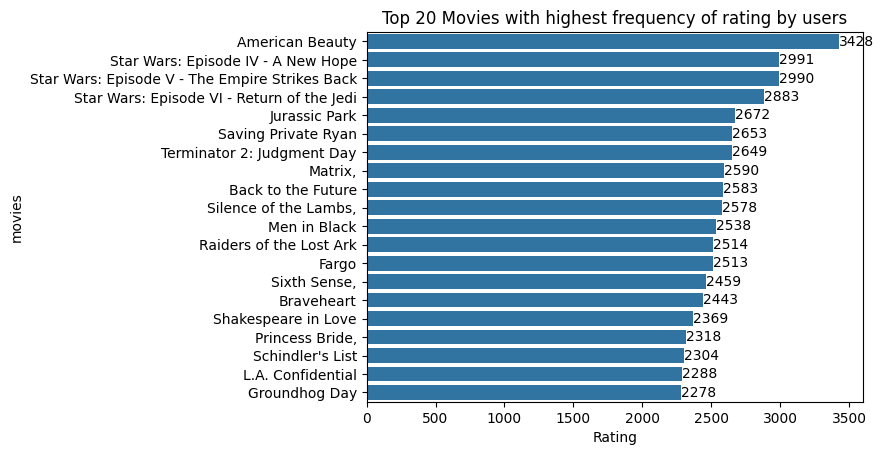

In [ ]:
label = sns.barplot(x=mm, y=top_20_lst)
for i in label.containers:
  label.bar_label(i)
plt.title("Top 20 Movies with highest frequency of rating by users")
plt.ylabel("movies")
plt.show()

### Range of ratings and the frequency of ratings per Movie.


In [ ]:
rating_range_frq= user_rating_movies.groupby("Title")["Rating"].agg(min_rating='min', max_rating='max', frequency_of_rating= "count").sort_values(by="frequency_of_rating", ascending= False)
rating_range_frq.head(20)

,min_rating,max_rating,frequency_of_rating
Title,,,
American Beauty,1,5,3428
Star Wars: Episode IV - A New Hope,1,5,2991
Star Wars: Episode V - The Empire Strikes Back,1,5,2990
Star Wars: Episode VI - Return of the Jedi,1,5,2883
Jurassic Park,1,5,2672
Saving Private Ryan,1,5,2653
Terminator 2: Judgment Day,1,5,2649
"Matrix,",1,5,2590
Back to the Future,1,5,2583


- "American Beauty" have highest frequency of rating and have range from 1 to 5 ratings.
- All of the top 20 movies have frequency rating above 2000 and rating range from 1 to 5.

In [ ]:
rating_range_frq.tail(20)

,min_rating,max_rating,frequency_of_rating
Title,,,
Small Faces,2,2,1
"Bat Whispers,",2,2,1
Tinseltown,2,2,1
Open Season,3,3,1
"Fantastic Night, The La Nuit Fantastique",1,1,1
I Don't Want to Talk About It De eso no se habla,4,4,1
One Man's Hero,2,2,1
Death in Brunswick,3,3,1
One Little Indian,5,5,1


- **From above range and frequency of rating per Movie we can see that if movie have more frequency then the range of rating varies from 1 to 5 and if rating frequency is very low then we can see we faces biasness.**

### Range of ratings and the frequency of ratings per User

In [ ]:
rating_range_frq_per_user = user_rating_movies.groupby("UserID")["Rating"].agg(min_rating='min', max_rating='max', frequency_of_rating= "count").sort_values(by="frequency_of_rating", ascending= False)
rating_range_frq_per_user.head(20)

,min_rating,max_rating,frequency_of_rating
UserID,,,
4169,1,5,2314
1680,1,5,1850
4277,2,5,1743
1941,1,5,1595
1181,1,5,1521
889,1,5,1518
3618,1,5,1344
2063,1,5,1323
1150,1,5,1302


- userID 4277 is in 3rd place as per frequency of rating but he does not rated any movie as 1.

**Distribution of Average rating given by each user**|

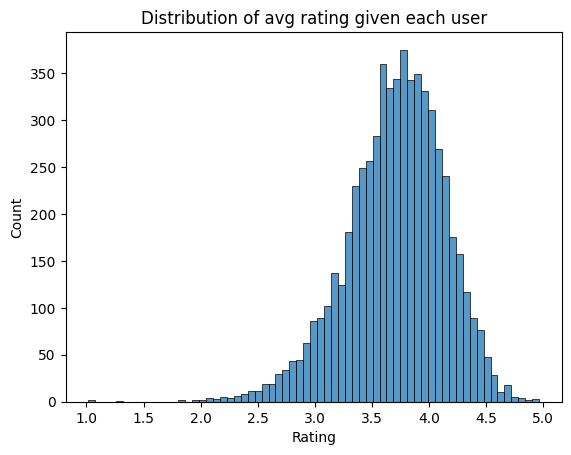

In [ ]:
sns.histplot(user_rating_movies[['UserID','Rating']].groupby('UserID').mean()["Rating"])
plt.title("Distribution of avg rating given each user")
plt.show()

**Distribution of avg rating given to each movies.**

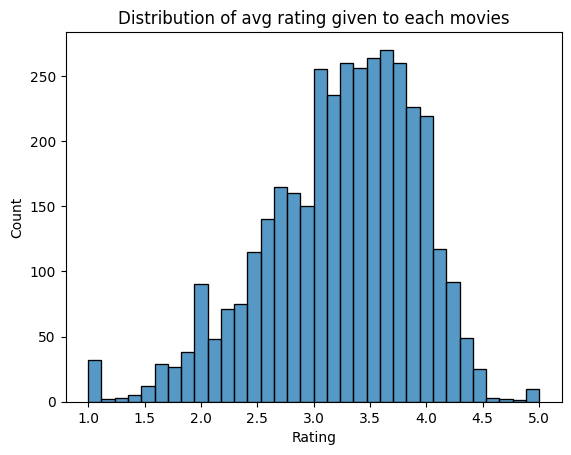

In [ ]:
sns.histplot(user_rating_movies[['MovieID','Rating']].groupby('MovieID').mean()["Rating"])
plt.title("Distribution of avg rating given to each movies")
plt.show()

**Transforming the numerical representation of occupations into their respective assigned labels.**

In [ ]:
occ_map= {0: "other or not specified",
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}

user_rating_movies["Occupation"]= user_rating_movies["Occupation"].map(occ_map)

### Frequency of rating per Occupation

In [ ]:
user_rating_movies.groupby("Occupation")["Rating"].count().sort_values(ascending=False)

Occupation
college/grad student      131032
other or not specified    130499
executive/managerial      105425
academic/educator          85351
technician/engineer        72816
writer                     60397
programmer                 57214
artist                     50068
sales/marketing            49109
self-employed              46021
doctor/health care         37205
clerical/admin             31623
K-12 student               23290
scientist                  22951
customer service           21850
lawyer                     20563
unemployed                 14904
retired                    13754
tradesman/craftsman        12086
homemaker                  11345
farmer                      2706
Name: Rating, dtype: int64

In [ ]:
# In percentage
user_rating_movies.groupby("Occupation")["Rating"].count().sort_values(ascending=False)/len(user_rating_movies)*100

Occupation
college/grad student      13.100462
other or not specified    13.047173
executive/managerial      10.540297
academic/educator          8.533317
technician/engineer        7.280078
writer                     6.038438
programmer                 5.720204
artist                     5.005754
sales/marketing            4.909874
self-employed              4.601138
doctor/health care         3.719723
clerical/admin             3.161639
K-12 student               2.328513
scientist                  2.294620
customer service           2.184543
lawyer                     2.055870
unemployed                 1.490089
retired                    1.375113
tradesman/craftsman        1.208347
homemaker                  1.134263
farmer                     0.270543
Name: Rating, dtype: float64

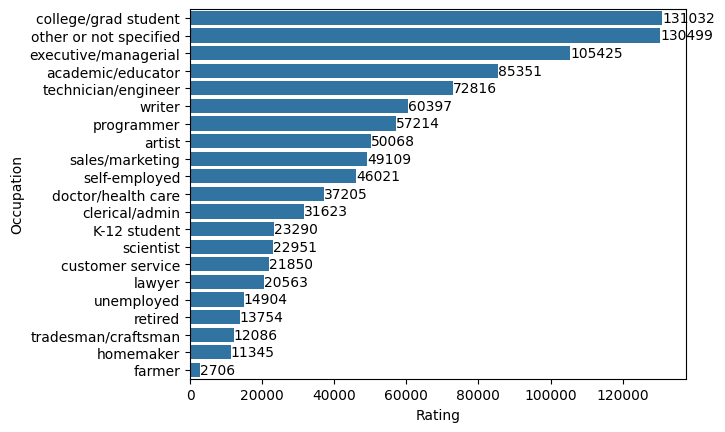

In [ ]:
lbl= sns.barplot(x=user_rating_movies.groupby("Occupation")["Rating"].count().sort_values(ascending=False),
           y= user_rating_movies.groupby("Occupation")["Rating"].count().sort_values(ascending=False).index)
for i in lbl.containers:
  lbl.bar_label(i)

plt.show()

- User occupation as "college/grad student" rated most number of movies(131032).
- Closely followd by "Other or not specified".
- User occupation as "farmer" rated very few movies(2706).

**Transforming the numerical representation of Age into their respective assigned labels**

In [ ]:
age_map= {1: "Under 18",
          18: "18-24",
          25: "25-34",
          35: "35-44",
          45: "45-49",
          50: "50-55",
          56: "56+"
          }

user_rating_movies["Age"]= user_rating_movies["Age"].map(age_map)

In [ ]:
# In percentage
user_rating_movies.groupby("Age")["Rating"].count().sort_values(ascending=False)/len(user_rating_movies)*100

Age
25-34       39.547335
35-44       19.896142
18-24       18.349765
45-49        8.361552
50-55        7.247485
56+          3.877190
Under 18     2.720531
Name: Rating, dtype: float64

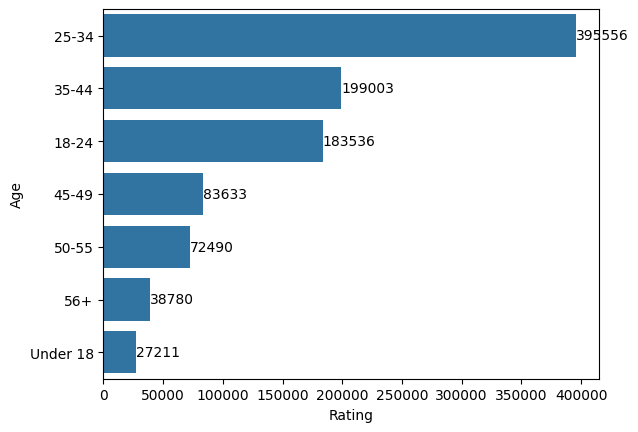

In [ ]:
lbl= sns.barplot(x=user_rating_movies.groupby("Age")["Rating"].count().sort_values(ascending=False),
           y= user_rating_movies.groupby("Age")["Rating"].count().sort_values(ascending=False).index)
for i in lbl.containers:
  lbl.bar_label(i)

plt.show()

- User with age range between 25 to 34 have most frequency of rating 39.6%
- User with age range below 18 and age more than 56 years have very less frequency of rating (2.8% and 3.8% resp.)

### Checking null values

In [ ]:

user_rating_movies.isna().sum()/len(user_rating_movies)*100

UserID          0.000000
Gender          0.000000
Age             0.000000
Occupation      0.000000
Zip-code        0.000000
MovieID         0.000000
Rating          0.000000
Timestamp       0.000000
Title           0.000000
Genres          0.390818
Release_year    0.178463
dtype: float64

- In feature "Genres" and "Release_year" have very few missing values
- overall only 0.4% to 0.5% missing value so we can drop it

In [ ]:
# droping null values because it less in number
user_rating_movies.dropna(inplace=True)

In [ ]:
#checking if duplicated values are present in data.
user_rating_movies.duplicated().sum()

0

###Frequency of movies rating as per Release Year of movies

<Axes: xlabel='Release_year'>

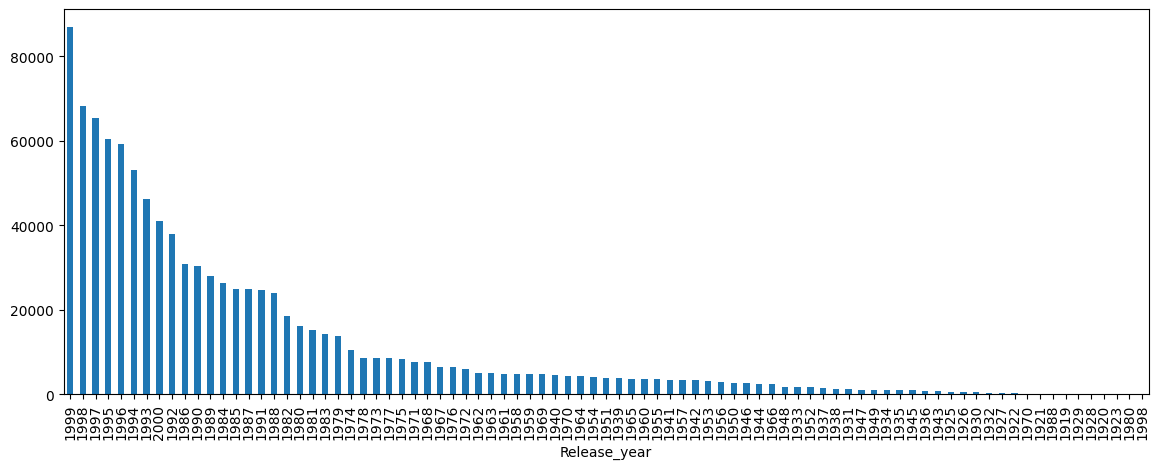

In [ ]:
user_rating_movies["Release_year"].value_counts().plot(kind="bar", figsize=(14, 5))

- **Movies released in 1999 have high rating frequency**

In [ ]:
user_rating_movies["Release_year"]= user_rating_movies["Release_year"].astype("str")

In [ ]:
# "Release_year" dtype is object so converting it to int type for merging.
user_rating_movies["Release_year"]= user_rating_movies["Release_year"].astype("int")

**- Grouping the Release_year decade wise**

In [ ]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
user_rating_movies['Release_Decade'] = pd.cut(user_rating_movies['Release_year'], bins=bins, labels=labels)

In [ ]:
user_rating_movies.head(2)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Release_year,Release_Decade
0,1,F,Under 18,K-12 student,48067,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest,Drama,1975,70s
1,2,M,56+,self-employed,70072,1193,5,2000-12-31 21:33:33,One Flew Over the Cuckoo's Nest,Drama,1975,70s


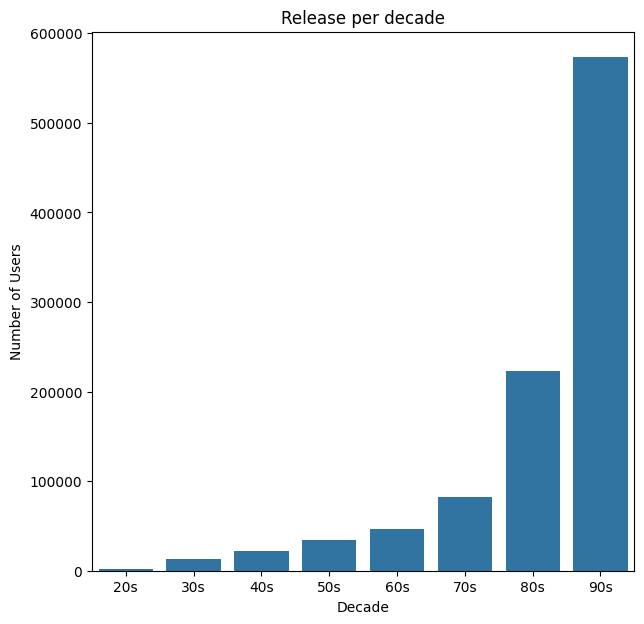

In [ ]:
plt.figure(figsize=(7, 7))
sns.barplot(y=user_rating_movies.groupby("Release_Decade")["Rating"].count().sort_values(ascending=True),
           x= user_rating_movies.groupby("Release_Decade")["Rating"].count().sort_values(ascending=True).index)
plt.title('Release per decade')
plt.xlabel('Decade')
plt.ylabel('Number of Users')
plt.show()

- **90s have most number of released movies.**

## Creating feature Average rating given by each user, Avg rating received by each movie, Total rating per movies and total rating per user.

In [ ]:
user_rating_movies["User_avg_rating"]= user_rating_movies.groupby("UserID")["Rating"].transform("mean")
user_rating_movies["User_rating_count"]= user_rating_movies.groupby("UserID")["Rating"].transform("count")

In [ ]:
user_rating_movies["Movie_avg_rating"]= user_rating_movies.groupby("MovieID")["Rating"].transform("mean")
user_rating_movies["Movie_rating_count"]= user_rating_movies.groupby("MovieID")["Rating"].transform("count")

In [ ]:
user_rating_movies.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Release_year,Release_Decade,User_avg_rating,User_rating_count,Movie_avg_rating,Movie_rating_count
0,1,F,Under 18,K-12 student,48067,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest,Drama,1975,70s,4.188679,53,4.390725,1725
1,2,M,56+,self-employed,70072,1193,5,2000-12-31 21:33:33,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.713178,129,4.390725,1725
2,12,M,25-34,programmer,32793,1193,4,2000-12-30 23:49:39,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.826087,23,4.390725,1725
3,15,M,25-34,executive/managerial,22903,1193,4,2000-12-30 18:01:19,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.323383,201,4.390725,1725
4,17,M,50-55,academic/educator,95350,1193,5,2000-12-30 06:41:11,One Flew Over the Cuckoo's Nest,Drama,1975,70s,4.066986,209,4.390725,1725


### Cleaning Genre column

In [ ]:
user_rating_movies["Genres"].value_counts()[:20]

Genres
Comedy                     116691
Drama                      110959
Comedy|Romance              42193
Comedy|Drama                41676
Drama|Romance               28100
Action|Thriller             26759
Horror                      22216
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     15712
Drama|War                   14422
Action|Sci-Fi               14173
Action|Sci-Fi|Thriller      13970
Action                      12311
Action|Drama|War            12224
Crime|Drama                 11870
Comedy|Drama|Romance        10827
Action|Adventure            10309
Action|Drama                 9750
Comedy|Horror                9653
Name: count, dtype: int64

In [ ]:
user_rating_movies["Genres"].nunique()

361

In [ ]:
user_rating_movies["Genres"].unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Animation|Children's|Music", "Adventure|Children's|Drama|Musical",
       'Musical', 'Comedy', "Animation|Children's", 'Comedy|Fantasy',
       'Animation', 'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-F", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantas',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama', 'Action|Adventur',
       'Action|Adventure|Sci-Fi|Thriller', 'Action|Adventu',
       'Action|Thriller', 'Action

In [ ]:
def splt(x):
    user_rating_movies[x]= user_rating_movies[x].str.split("|")
    return user_rating_movies[x]


In [ ]:
splt("Genres")

0                           [Drama]
1                           [Drama]
2                           [Drama]
3                           [Drama]
4                           [Drama]
                     ...           
1000204               [Documentary]
1000205                     [Drama]
1000206                     [Drama]
1000207    [Comedy, Drama, Western]
1000208               [Documentary]
Name: Genres, Length: 996300, dtype: object

In [ ]:
user_rating_movies= user_rating_movies.explode("Genres")

In [ ]:
user_rating_movies["Genres"].nunique()

63

In [ ]:
user_rating_movies["Genres"].unique()

array(['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Music', 'Fantasy', 'Sci-Fi', 'War',
       'Sci-F', 'Thriller', 'Crime', 'Fantas', 'Mystery', 'Adventur',
       'Adventu', 'Western', 'Th', 'Horror', '', 'S', 'Film-Noir', 'Adv',
       'Horro', 'R', 'Documentary', 'Comed', 'Com', 'Dram', 'D', 'Fant',
       'A', 'Sci-', 'Ro', 'Children', "Children'", 'F', 'Docu', 'Roman',
       'Sci', 'Dr', 'Thrille', 'Come', 'Thri', 'Wester', 'Childre',
       'Advent', 'We', 'Chi', 'Rom', 'Wa', 'Chil', 'Childr', 'Roma',
       'Documenta', 'Animati', 'Horr', 'Acti', 'Document', 'Documen'],
      dtype=object)

- In above we can see Genres column have some type error

In [ ]:
user_rating_movies.isna().sum()

UserID                 0
Gender                 0
Age                    0
Occupation             0
Zip-code               0
MovieID                0
Rating                 0
Timestamp              0
Title                  0
Genres                 0
Release_year           0
Release_Decade        48
User_avg_rating        0
User_rating_count      0
Movie_avg_rating       0
Movie_rating_count     0
dtype: int64

In [ ]:
user_rating_movies["Genres"] = user_rating_movies["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama","Documenta":"Documentary",
                     "Wester":"Western","Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                      "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller",
                        "Chi":"Children's","Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical","Children":"Children's" ,"Horr":"Horror",
                     "Children'":"Children's","Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                    })

In [ ]:
user_rating_movies["Genres"].unique()

array(['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller',
       'Crime', 'Mystery', 'Western', 'Horror', 'Other', 'Film-Noir',
       'Documentary'], dtype=object)

In [ ]:
user_rating_movies.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Release_year,Release_Decade,User_avg_rating,User_rating_count,Movie_avg_rating,Movie_rating_count
0,1,F,Under 18,K-12 student,48067,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest,Drama,1975,70s,4.188679,53,4.390725,1725
1,2,M,56+,self-employed,70072,1193,5,2000-12-31 21:33:33,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.713178,129,4.390725,1725
2,12,M,25-34,programmer,32793,1193,4,2000-12-30 23:49:39,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.826087,23,4.390725,1725
3,15,M,25-34,executive/managerial,22903,1193,4,2000-12-30 18:01:19,One Flew Over the Cuckoo's Nest,Drama,1975,70s,3.323383,201,4.390725,1725
4,17,M,50-55,academic/educator,95350,1193,5,2000-12-30 06:41:11,One Flew Over the Cuckoo's Nest,Drama,1975,70s,4.066986,209,4.390725,1725


In [ ]:
user_rating_movies["Genres"].value_counts(normalize=True)*100

Genres
Comedy         17.159965
Drama          16.995624
Action         12.453139
Thriller        9.148988
Romance         6.905824
Sci-Fi          6.895534
Adventure       6.500746
Crime           3.853087
Horror          3.701899
Children's      3.489071
War             2.968236
Animation       2.084502
Musical         2.012427
Mystery         1.919579
Fantasy         1.561193
Western         1.004102
Film-Noir       0.886307
Documentary     0.380809
Other           0.078967
Name: proportion, dtype: float64

- Movies with Comedy Genre has highest percentage 17.15%

### Pivot table of movie titles and userid

In [ ]:
pivot_movi_user = pd.pivot_table(user_rating_movies, index='UserID', columns='Title', values='Rating', aggfunc='mean')
pivot_movi_user.tail()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs,",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior,",...,"Young Poisoner's Handbook,",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin Kjærlighetens kjøtere,Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_movi_user.shape

(6040, 3644)

In [ ]:
# filling null values with zeros showing its there is not rating by the user for that movie
pivot_movi_user.fillna(0, inplace=True)

In [ ]:
pivot_movi_user.tail()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs,",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior,",...,"Young Poisoner's Handbook,",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin Kjærlighetens kjøtere,Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Recommender System using Pearson Correlation - Item-based approach

In [ ]:
prsn_crr= pivot_movi_user.corr()

In [ ]:
def pearson_recommender():
    try:
        movie_name = input("ENTER MOVIE NAME: ")
        print("-" * 80, "\n Similar movies based on Pearson Correlation\n")
        return prsn_crr[movie_name].sort_values(ascending=False).iloc[1:6]
    except KeyError:
        print("Error: Movie not found in the dataset.")
    except Exception as e:
        print("An unexpected error occurred:", e)

pearson_recommender()

ENTER MOVIE NAME: Matrix
-------------------------------------------------------------------------------- 
 Similar movies based on Pearson Correlation

Error: Movie not found in the dataset.


### Recommender System using Cosine Similarity

 - **Item similarity**

In [ ]:
itm= pivot_movi_user.T
itm.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
itm_sim= cosine_similarity(itm)

In [ ]:
itm_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

In [ ]:
item_sim = pd.DataFrame(itm_sim, index=pivot_movi_user.columns, columns=pivot_movi_user.columns)
item_sim.head(2)

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs,",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior,",...,"Young Poisoner's Handbook,",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin Kjærlighetens kjøtere,Zeus and Roxanne,eXistenZ
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",1.000000,0.072357,0.037011,0.079291,0.060838,0.0,0.058619,0.189843,0.094785,0.058418,...,0.038725,0.076474,0.000000,0.044074,0.0,0.04528,0.039395,0.0,0.120242,0.027003
'Night Mother,0.072357,1.000000,0.115290,0.115545,0.159526,0.0,0.076798,0.137135,0.111413,0.046135,...,0.053010,0.087828,0.063758,0.135962,0.0,0.09115,0.074787,0.0,0.000000,0.077807


- **User Similarity**

In [ ]:
usr_sim= cosine_similarity(pivot_movi_user)

In [ ]:
user_sim = pd.DataFrame(usr_sim, index=pivot_movi_user.index, columns=pivot_movi_user.index)
user_sim.head(2)

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.096382,0.120610,0.132455,0.090158,0.18124,0.059678,0.138241,0.226148,0.255319,...,0.170588,0.082006,0.090961,0.033663,0.114877,0.187913,0.136979,0.000000,0.176834,0.134765
2,0.096382,1.000000,0.151479,0.171176,0.114394,0.10200,0.305787,0.211120,0.190198,0.228266,...,0.112503,0.091222,0.268565,0.014286,0.183384,0.230182,0.207791,0.066118,0.067306,0.220196


### function to return top 5 recommendations for a given item

In [ ]:
def cosine_recommender():
    try:
        movie_name = input("ENTER MOVIE NAME: ")
        print("-" * 80, "\n Similar movies based on Cosine Correlation\n")
        return item_sim[movie_name].sort_values(ascending=False).iloc[1:6]
    except KeyError:
        print("Error: Movie not found in the dataset.")
    except Exception as e:
        print("An unexpected error occurred:", e)

cosine_recommender()

ENTER MOVIE NAME: Liar Liar
-------------------------------------------------------------------------------- 
 Similar movies based on Cosine Correlation



Title
Mrs. Doubtfire                0.557067
Ace Ventura: Pet Detective    0.516861
Dumb & Dumber                 0.512585
Home Alone                    0.511204
Wayne's World                 0.499368
Name: Liar Liar, dtype: float64

### Matrix Factorization using surprise

In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

- Defining SVD with 4 embeddings (d=4)
- rmse and mape with kfold of 5 splits
- Input = Userid, MovieID, Ratings


First, we installed Surprise and  now using the built-in Reader class and Dataset module to parse the data. SVD algorithm is equivalent to Probabilistic Matrix Factorization

In [ ]:
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(user_rating_movies[['UserID','MovieID','Rating']], reader)

We will train and predict with SVD

In [ ]:
model = SVD(n_factors=4)
cross_validate(model, data, measures=['RMSE', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8483  0.8424  0.8425  0.8429  0.8443  0.8441  0.0022  
MAE (testset)     0.6680  0.6625  0.6625  0.6623  0.6641  0.6639  0.0022  
Fit time          23.41   23.21   24.50   22.81   26.81   24.15   1.44    
Test time         5.31    2.76    5.35    2.64    5.61    4.33    1.34    


{'test_rmse': array([0.84830703, 0.84240841, 0.84248488, 0.84289819, 0.84429114]),
 'test_mae': array([0.6679808 , 0.66253863, 0.66251038, 0.66226986, 0.6640702 ]),
 'fit_time': (23.41133403778076,
  23.213059663772583,
  24.49896788597107,
  22.809950828552246,
  26.80850601196289),
 'test_time': (5.310405969619751,
  2.75691819190979,
  5.3465235233306885,
  2.6387906074523926,
  5.612555503845215)}

In [ ]:
# spliting the data in train and test dataset
# Then we use fit method to train
# test() method we will use to predict
trainset, testset = train_test_split(data, test_size=0.25)
model1= SVD(n_factors=4, random_state= 61)
pred = model1.fit(trainset).test(testset)
print(accuracy.rmse(pred))
print(accuracy.mae(pred))

RMSE: 0.8487
0.8487294467618747
MAE:  0.6682
0.6681745904558581


In [ ]:
absolute_errors = [abs(p.est - p.r_ui) for p in pred]
percentage_errors = [error / p.r_ui for error, p in zip(absolute_errors, pred)]
mape = sum(percentage_errors) / len(percentage_errors)

print("MAPE:", mape)

MAPE: 0.25514145328723153



**Insight and Recommendation about above model**
- The model1 is a Surprise SVD model with 4 embeddings (d=4). It was trained on a dataset of user ratings and tested on a holdout set of 25% of the data. The RMSE of the model is 0.8416 and the MAPE is 0.2529.

- The RMSE is a measure of the average error in the predicted ratings. A lower RMSE indicates a better model. The MAPE is a measure of the average percentage error in the predicted ratings. A lower MAPE indicates a better model.
- In the case of model1, the RMSE of 0.8416 indicates that the average error in the predicted ratings is 0.8416. This means that, on average, the model's predictions are off by about 0.8416 stars.

- The MAPE of 0.2529 indicates that the average percentage error in the predicted ratings is 25.29%. This means that, on average, the model's predictions are off by about 25.29% of the true rating.

- The RMSE and MAPE values for model1 are both relatively low, which indicates that the model is able to make accurate predictions. However, there is still room for improvement.

- Overall, model1 is a good starting point for building a recommender system.
- One way to improve the model would be to increase the number of embeddings (d). This would allow the model to learn more complex relationships between the users and the items. Another way to improve the model would be to use a different algorithm, such as KNNWithMeans.

**Overall Insights and Recommendations:**

--------------------------------------------------

1. **Movie Ratings:**
    - Most users gave a rating of 4 (34.89%) followed by 3 (28.68%).
    - Only 5.61% of movies were rated 1.

2. **Movie Genres:**
    - The top 10 most-rated genres are: Comedy, Drama, Action, Thriller, Romance, Adventure, Sci-Fi, Horror, Children's, and Animation.

3. **User Demographics:**
    - 72% of users are male, while 28% are female.
    - The majority of users (35%) are in the age range of 25-34.
    - The most common occupations are "college/grad student", "other or not specified", "executive/managerial", and "academic/educator".
    - the least active users are farmers, tradesmen/craftsmen, and unemployed individuals.

4. **Movie Release Years:**
    - Movies released in 1999 have the highest frequency of ratings.

5. **Average Rating per User and Movie:**
    - There is a wide distribution in the average rating given by each user and each movie.

6. **User Rating Frequency:**
    - Users with occupation "college/grad student" rated the most number of movies.

7. **Movie Rating Frequency:**
    - Movies released in 1999 have the highest frequency of ratings.

8. **User analysis:**
  - Most users are male (72%) and between the ages of 25 and 44 (55%).
  - The most frequent occupation is "college/grad student" (35%).
  - Users tend to give higher ratings to movies.

9. **Movie analysis:**
  - The most popular movies have been released between 1995 and 1999.
  - The most frequent genre is "Comdey" (17.15%).
  - The most popular movies among users are "American Beauty", "Star Wars: Episode IV - A New Hope", and "The Matrix".





**Pearson Similarity:**

* **Pros:**
    * Easy to understand and implement.
    * Computationally efficient.
    * Works well with small datasets.
* **Cons:**
    * Sensitive to outliers.
    * Not able to capture complex relationships between items.
    * Not able to handle missing values well.

**Cosine Similarity:**

* **Pros:**
    * Not sensitive to outliers.
    * Able to capture complex relationships between items.
    * Able to handle missing values well.
* **Cons:**
    * Computationally expensive.
    * Not as easy to understand as Pearson similarity.

In this case, cosine similarity is the better choice for a recommender system. This is because the dataset is large. Additionally, cosine similarity is able to capture complex relationships between items, which is important for a recommender system.


Questionnaire:

Q) Users of which age group have watched and rated the most number of movies?

Ans:

     User with age group of 25-34 have most frequency of rating.

------------------------------------------------------------------------------



Q) Users belonging to which profession have watched and rated the most movies?

Ans:

      User occupation as "college/grad student" rated most number of movies.

---------------------------------------------------------------------------


Q) Most of the users in our dataset who’ve rated the movies are Male. (T/F)?

Ans: True

----------------------------------------------------------------------------


Q) Most of the movies present in our dataset were released in which decade?

options:
a. 70s b. 90s c. 50s d.80s

     Ans:  option b. 90s

-------------------------------------------------------------------------


**The movie with maximum no. of ratings is <u>American Beauty</u>.**

----------------------------------------------


Q) Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

Ans:  
    
      top 3 movies similar to ‘Liar Liar’ are :
       1. Mrs. Doubtfire
       2. Ace Ventura: Pet Detective
       3. Dumb & Dumber  

------------------------------------------------


Q) On the basis of approach, Collaborative Filtering methods can be classified into **<u>Item</u>**-based and **<u>User</u>**-based.

-------------------------------------------------

Q) Pearson Correlation ranges between -1 to 1 whereas, Cosine Similarity belongs to the interval between 0 to 1.

-----------------------------------------------------


Q) Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

Ans:
       
       RMSE: 0.8416
       MAPE: 0.2529

--------------------------------

Q)  Give the sparse ‘row’ matrix representation for the following dense matrix -
[[1 0] [3 7]]

Ans:
   - The sparse 'row' matrix representation would be:

      - Values: [1, 3, 7]
      - Row Indices: [0, 1, 1]
      - Column Indices: [0, 0, 1]